# MNIST Classifier using Keras CNN

The project involves buliding a Convolutional Neural Net Classifier to classify handwritten numbers.It is divided into several parts:-


#### 1.Data Preparation and Preprocessing
####  2.Convolutional neural Nets
####  3.Model Evalution
####  4.Prediction on real life datasets

In [2]:

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
import matplotlib.pyplot as plt
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,BatchNormalization
from keras.optimizers import Adam,Adagrad #optimizers
from keras.datasets import mnist #Import datasets from inbulit Keras Datasets


## Data Preprocessing
We load the datasets of handwritten images from Keras' inbuilt MNIST dataset.The dataset contains 60000 train images and 10000 test images.

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


The next step is to normalize the data.We normalize the given tensor by MinMax Normalization Technique and also convert each pixel into the scale of 0 to 1.Initialize the type of float.

In [4]:
X_train=X_train.reshape(60000,28,28,1)
X_train=X_train.astype('float32')
X_train/=255
X_test=X_test.reshape(10000,28,28,1)
X_test=X_test.astype('float32')
X_test/=255

The next step involves converting all 10 classes of numbers into categorical variables using one-hot label encoding.
This can be done using keras' inbuilt function.

In [5]:
y_train_labels=keras.utils.to_categorical(y_train,10)
y_test_labels=keras.utils.to_categorical(y_test,10)

Let us have a look at the images in the dataset and the corresponding labels so that we can have a small idea.


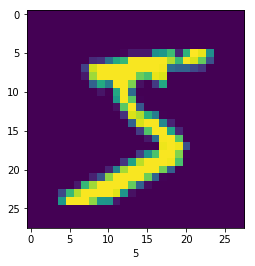

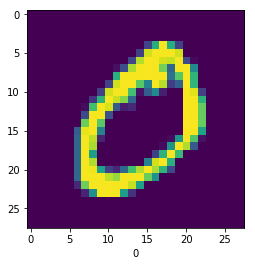

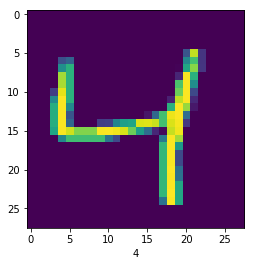

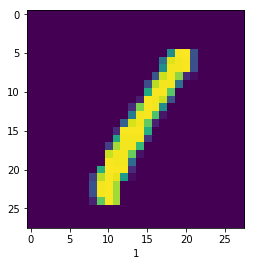

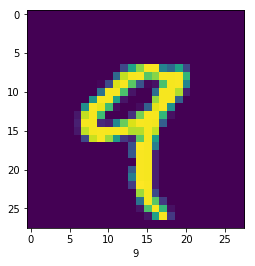

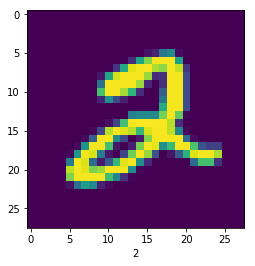

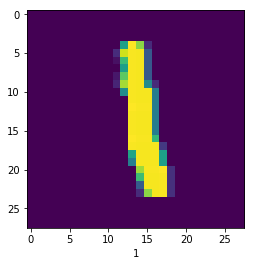

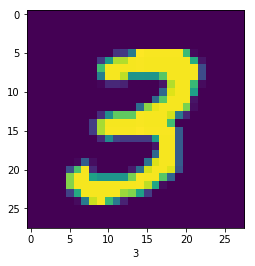

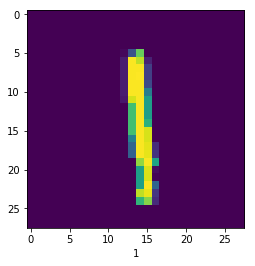

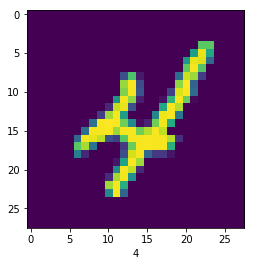

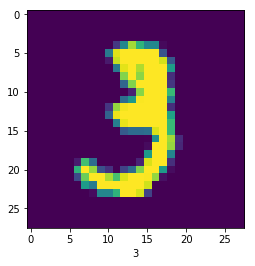

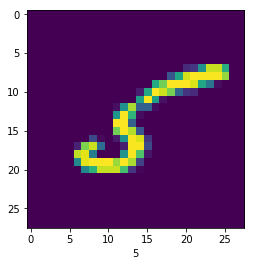

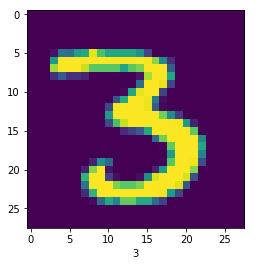

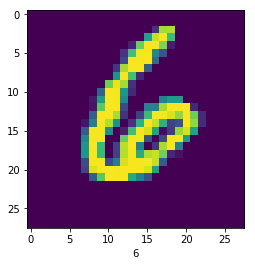

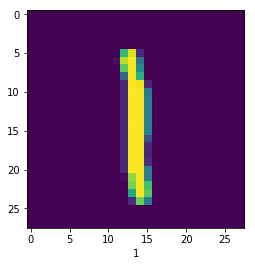

In [6]:
for i in range(15):
    plt.imshow(X_train[i].reshape(28,28))
    plt.xlabel(y_train_labels[i].argmax())
    plt.show()

Also Checking for null data so that model doesnt get confused.

## Model Creation
I have used the Keras sequential API to create a convolutional network architecture.The neural network is made up of 8 layers .The first layer consists of a 2D convolutional-size filter which takes in 2-D Array of 28px * 28px and creates 64 outputs with of 28* 28 dimensions.The second Layers consists of 2D-convolutional sized filters of size=(2,2) and creates 32 outputs of the same size.Then we have applied the Maxpooling2D layer to downsize the input to 13 * 13 * 32 tensors.We apply Inverse Dropout 1/4 of outputs to prevent overfitting of dataset.

The next layer consists of a 2D convolutional-size filter which takes in 2-D Array of 13px * 13 px and creates 64 outputs with of 28* 28 dimensions.The second Layers consists of 2D-convolutional sized filters of size=(2,2) and creates 32 outputs of the same size.Then we have applied the Maxpooling2D layer to downsize the input to 6 * 6 * 32 tensors.We apply Inverse Dropout to 1/4 of outputs to prevent overfitting of dataset.

We now flatten the tensors into 1-D matrix of dims(1,1152) and feed this to a normal neural network consisting of first layer with 64 nodes and finally output nodes each containing the probabilities of each class.All layers use activation of 'relu' except for the final layer which is a softmax output.The model contains 110,026 trainable parameters which are very less as compared to feeding images to normal straight architectural neural nets.


In [7]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1,)))
model.add(Conv2D(32,kernel_size=(2,2),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(32,kernel_size=(2,2),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
__________

 I train my model using the Adam optimizer and basing my metrics on accuracy.The batch size is of 500 and the training continues for 15 continuous epochs.The loss functions involve the categorical_crossentropy function(or the normal cost function for normal logistic regression with multiple classes).

In [8]:
model.compile(loss="categorical_crossentropy",optimizer=Adam(),metrics=['accuracy'])
model.fit(X_train,y_train_labels,batch_size=500,epochs=15,validation_data=(X_test,y_test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 233s 4ms/step - loss: 0.4979 - acc: 0.8377 - val_loss: 0.0762 - val_acc: 0.9764
Epoch 2/15
60000/60000 [==============================] - 230s 4ms/step - loss: 0.0985 - acc: 0.9696 - val_loss: 0.0480 - val_acc: 0.9843
Epoch 3/15
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0683 - acc: 0.9784 - val_loss: 0.0328 - val_acc: 0.9887
Epoch 4/15
60000/60000 [==============================] - 221s 4ms/step - loss: 0.0570 - acc: 0.9824 - val_loss: 0.0376 - val_acc: 0.9880
Epoch 5/15
60000/60000 [==============================] - 234s 4ms/step - loss: 0.0493 - acc: 0.9849 - val_loss: 0.0258 - val_acc: 0.9921
Epoch 6/15
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0414 - acc: 0.9874 - val_loss: 0.0253 - val_acc: 0.9921
Epoch 7/15
60000/60000 [==============================] - 233s 4ms/step - loss: 0.0368 - acc: 0.9883 - val_loss: 0.0235 - 

The model took approximately 55 minutes to train on a normal Intel CPU.However this can be further speed up with a good GPU.The model achieved an accuracy of 99.3% on the test set and an accuracy of 99.33% on the validation set.An accuracy which is pretty high and non achievable with normal neural networks.Let us know visualize some of these layers.

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/Users/r17935avinash/Downloads/model_plot.png', show_shapes=True, show_layer_names=True)

Let us predict some of the images of the test dataset which to evaluate whether our model has done well or not.


The predicted Label is: 7
The Actual Label is: 7


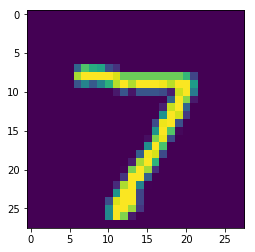

The predicted Label is: 0
The Actual Label is: 0


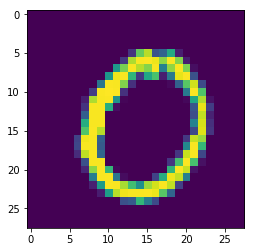

The predicted Label is: 1
The Actual Label is: 1


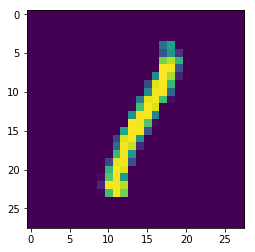

The predicted Label is: 2
The Actual Label is: 2


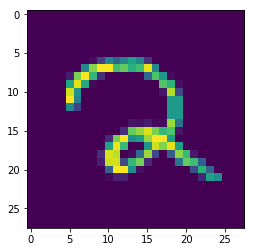

The predicted Label is: 2
The Actual Label is: 2


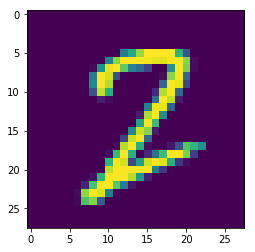

The predicted Label is: 3
The Actual Label is: 3


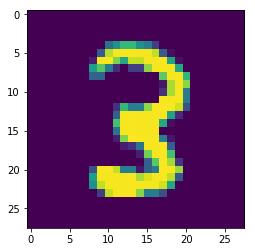

The predicted Label is: 8
The Actual Label is: 8


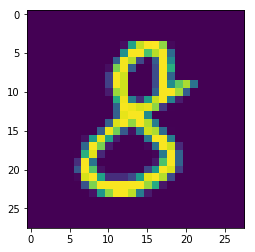

The predicted Label is: 4
The Actual Label is: 4


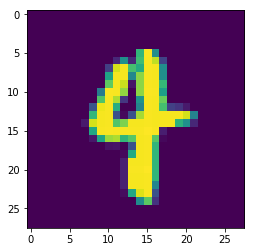

The predicted Label is: 3
The Actual Label is: 3


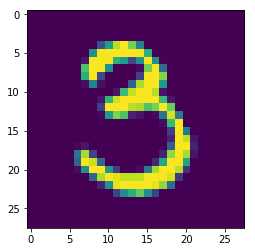

The predicted Label is: 7
The Actual Label is: 7


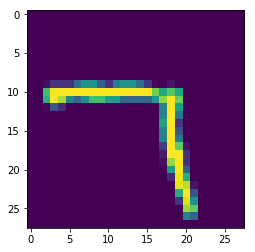

The predicted Label is: 4
The Actual Label is: 4


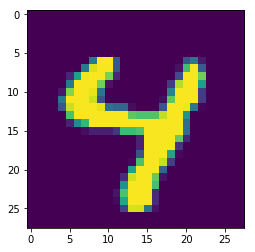

The predicted Label is: 4
The Actual Label is: 4


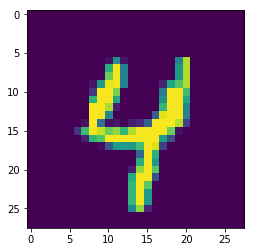

The predicted Label is: 6
The Actual Label is: 6


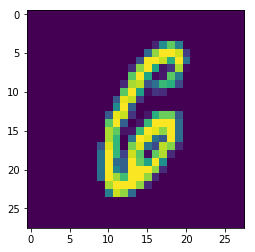

The predicted Label is: 4
The Actual Label is: 4


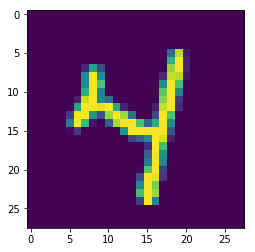

The predicted Label is: 9
The Actual Label is: 9


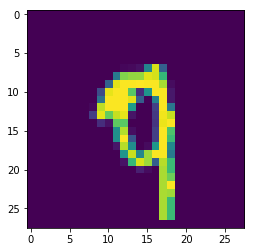

The predicted Label is: 1
The Actual Label is: 1


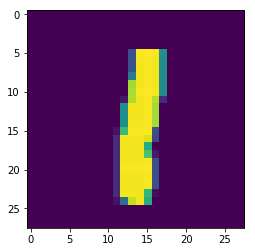

The predicted Label is: 6
The Actual Label is: 6


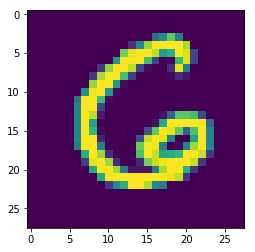

The predicted Label is: 8
The Actual Label is: 8


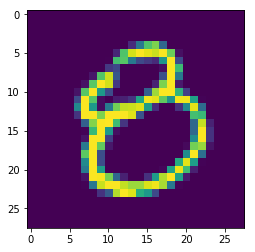

The predicted Label is: 6
The Actual Label is: 6


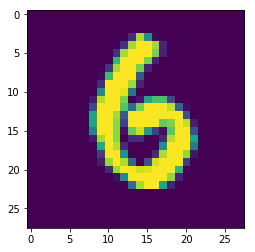

The predicted Label is: 7
The Actual Label is: 7


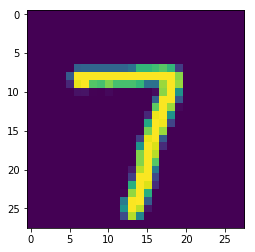

In [10]:
for i in range(20):
    print("The predicted Label is:",model.predict(X_test[i*100+i].reshape(1,28,28,1)).argmax())
    print("The Actual Label is:",y_test_labels[i*100+i].argmax())
    plt.imshow(X_test[i*100+i].reshape(28,28))
    plt.show()


We can see that our model can predict a lot of the handwritten images accurately and some of these images which might be even difficult for humans to detect properly.Let us also evaluate the model using a confusion matrix.

In [11]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
confusion_matrix(y_test, Y_pred_classes) 

array([[ 978,    0,    0,    1,    0,    0,    0,    0,    1,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1, 1029,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    1, 1007,    0,    1,    0,    0,    1,    0],
       [   0,    0,    0,    0,  980,    0,    0,    0,    1,    1],
       [   1,    0,    0,    6,    0,  883,    1,    0,    0,    1],
       [   1,    1,    1,    0,    1,    1,  953,    0,    0,    0],
       [   0,    2,    5,    0,    0,    0,    0, 1018,    1,    2],
       [   1,    0,    2,    1,    1,    1,    0,    1,  965,    2],
       [   0,    0,    1,    0,    4,    1,    0,    2,    1, 1000]])

We still see that model is still not able to classify some of the images properly.